***

<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    CUSTOMER SEGMENTATION 🛒<br>
    <br> WITH DEPLOYMENT</b></p> 
<p style="font-family:verdana;text-align:center">***************</p>
<p style="font-family:verdana;text-align:center">In this notebook we will be using K-Means clustering on given dataset to form the clusters. Then analyse the clusters for insights and do customer profiling. Then we will create a model using GradientBoosting Regressor to predict the cluster for new customer. we will creat a pipeline of all the code and deploy it using streamlit. </p>


***

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> IMPORTING LIBRARIES & DATASET </h2> 

### **Lets import the required libraries...**

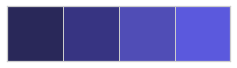

In [51]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
sns.palplot(palette) # print color palette

### **Its time to load our data to `df` variable...**  
**Note:** The csv file is tab seperated, so i'll need to set `sep` parameter to `'\t'`

In [52]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

***

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">INITIAL ANALYSIS</h2> 

### **Understand The Data** 🧠
I always ask these following quetions to undertand the data
### 1.How big is data?

In [53]:
df.shape

(2240, 29)

### 2.How does the data look like?

In [54]:
df.sample(5) # sample selects random rows from your data 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1962,6355,1978,Graduation,Married,44359.0,1,1,17-06-2014,19,20,0,14,7,3,1,3,2,0,4,3,0,0,0,0,0,0,3,11,0
2067,7899,1952,PhD,Married,77610.0,0,1,29-10-2012,70,1245,33,332,21,33,16,2,4,7,4,7,0,0,0,0,0,0,3,11,0
271,5726,1983,Master,Single,31788.0,1,0,20-03-2014,15,16,7,23,0,8,6,3,3,0,4,5,0,0,0,0,0,1,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
1156,967,1976,Graduation,Married,46049.0,1,1,21-07-2013,11,342,9,112,19,14,19,10,5,2,9,7,0,0,0,0,0,0,3,11,1


### 3.What is the data type of cols?

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 4.Are there any missing values?

In [56]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 5.How does the data look mathematically?

In [57]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 6.Are there duplicate values?

In [58]:
df.duplicated().sum()

0

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Data contains 2240 rows and 29 columns <br>
           2. It has 1 float, 3 object and 25 int columns <br>
           3. Datetime columns have int datatype, need to fix that <br>
           4. Many categorical columns are alredy in int format, like AcceptedCmp1, Response <br>
           5. There are 24 missing values in Income column <br>
           6. There are no duplicate values within data
        </p>
    </div>

***

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">DATA CLEANING & FEATURE CONSTRUCTION</h2> 

### **Steps To Follow:**
*  First of all I am going to fix the column names
*  I will convert the datetime column into correct format
*  Then I'll take care of the missing values
*  Examin the unique values within categorical columns
*  Check the timeline of the data since we have datetime columns given

In [59]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [60]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [61]:
# Check the skewness before imputation of numeric cols
df['Income'].skew()

6.763487372811116

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
If the skewness is less than -1 or greater than 1, the data are highly skewed.
</div>

In [62]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [63]:
# check the unique values
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [64]:
# check the unique values
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [65]:
# findout the first and last date in dataset
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

### **Steps To Follow:**
*  Create `Age`,`Years_Customer` and `Days_Customer` columns by substracting last date of `Dt_Customer` from `Year_Birth` and `Dt_Customer`
*  Create `TotalMntSpent`,`TotalNumPurchases` and `TotalAccCmp` by adding the relative columns
*  Create `Year_Joined`,`Month_Joined` and `Day_Joined` columns through `dt_Customer`
*  Create `Age_Group` column by dividing `Age` column into different groups
*  Create `Children` column by adding `Kidhome` and `Teenhome` columns
* Create `Partner` and `Education_Level` for simplifying `Marital_Status` and `Education` columns
* Drop the redundant columns

In [66]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [67]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [68]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [69]:
print(df.shape)
df.sample(5)

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
270,Graduation,Single,69267.0,0,0,31,778,44,499,95,73,146,2,3,4,5,7,0,0,0,0,0,0,1,61,2,805,1635,14,1,2012,September,Saturday,Middel Aged,0,No,Graduate
173,PhD,Together,53537.0,1,1,17,81,0,6,0,0,6,2,2,1,3,5,0,0,0,0,0,0,0,55,0,310,93,8,0,2014,January,Thursday,Middel Aged,2,Yes,Postgraduate
936,Graduation,Together,71796.0,0,0,54,354,21,311,167,75,32,1,9,3,4,4,0,0,0,0,0,0,0,43,1,408,960,17,0,2013,October,Thursday,Adult,0,Yes,Graduate
1961,PhD,Widow,71670.0,0,0,8,1462,16,128,0,0,160,1,5,3,6,6,0,1,1,0,1,0,1,52,1,455,1766,15,4,2013,September,Saturday,Middel Aged,0,No,Postgraduate
69,Graduation,Together,74854.0,1,2,90,856,59,487,58,29,73,7,2,5,5,5,0,0,0,0,0,0,0,44,1,489,1562,19,0,2013,August,Sunday,Adult,3,Yes,Graduate


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The above dataset is really good to perform EDA. I can extract really good insights from all these columns. However i won't be using all these columns to form clusters. Lots of the data we have like Amount spents on different products, number of purchases etc. This data won't be available for new customers. So i will be training model using those columns only wich will be available for new customers so the model can predict the cluster. I hope you Understood it.
</div>

I have seperate notebook for eda --> [here](https://www.kaggle.com/code/rohitshirudkar/customer-personality-data-analysis-eda?scriptVersionId=99776600&cellId=32) <br>
I also have performed clustering on all columns using PCA & K-Means --> [here](https://www.kaggle.com/code/rohitshirudkar/complete-customer-segmentation-pca-k-means)

In [70]:
df1 = df.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

#### Let's use capping technique to treat outliers

Capping:
Instead of trimming or removing the values from the dataset, we convert the outliers and bring them in the limit or range of our data. Here we will convert all the outliers values to value of upper whisker and lower whisker.

In [71]:
num_col = df1.select_dtypes(include = np.number).columns

In [72]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


***

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">FEATURE TRANSFORMATION</h2> 

As I already explained above, I will use subset of data to form clusters

In [73]:
# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


In [74]:
# examin the min, max and mean of your columns
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,0.444196,0.506250,45.147768
std,20936.104821,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51381.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


### **Make the pipelines**

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Pipeline: A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.
</div>

Always try to build pipelines whenever you are going to deploy the model

In [75]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [76]:
# I am not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [77]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [78]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [79]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [80]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">K-MEANS CLUSTERING & CLUSTER's ANALYSIS</h2> 

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K.
</div>



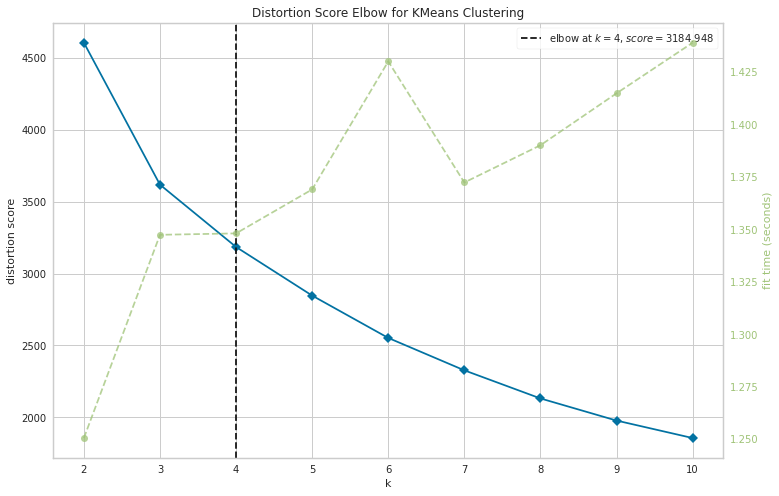

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

From above it is clear that k=4

In [82]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column

In [83]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,1
3,26646.0,1,0,30,Yes,Graduate,0
4,58293.0,1,0,33,Yes,Postgraduate,1


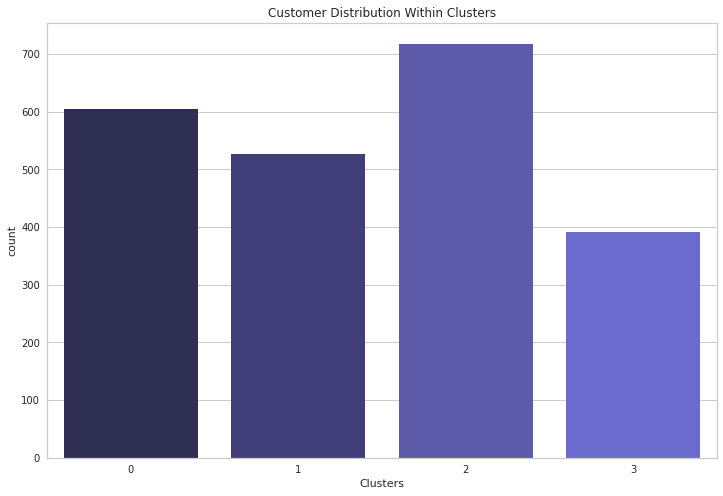

In [84]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Cluster 2 has highest number of customers <br>
           2. Cluster 3 has least number of customers <br>
        </p>
    </div>

### Lets find out what number of customers in each cluster have how many Kids or Teens in household, how many of them have partner and their education level

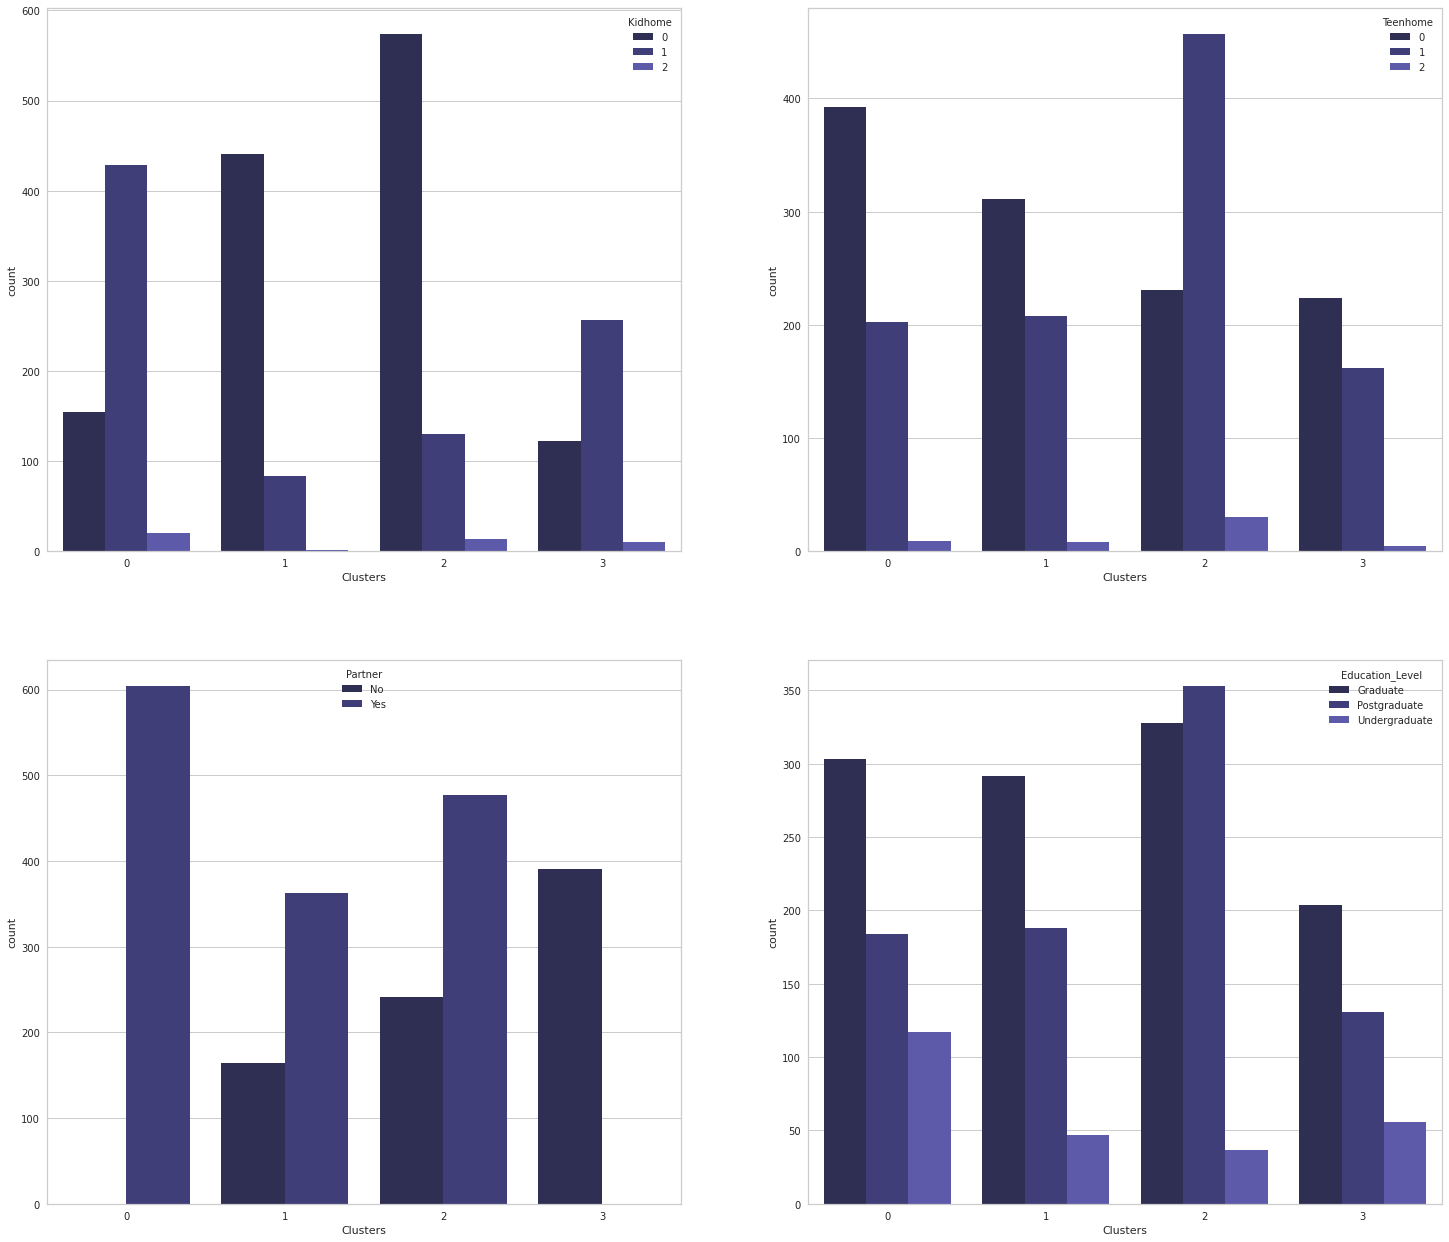

In [85]:
# create list of categories
count_cols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(count_cols):
    sns.countplot(x='Clusters', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>

    
**Kidhome:**
* Cluster 0 mostly has customers with 1 kid in household 
* Cluster 1 has customers with no kids in household
* Cluster 2 also has large number of customers with no kids in household
* Cluster 3 has customers with 0 and 1 kids in household
    
**Teenhome:**
* Cluster 0 consist of customers with no teen in household & few of them have 1 Teen in household
* Same goes for the cluster 1 & 3
* Cluster 2 has customers with 1 Teen in household

**Partner:**
* All the customers in cluster 0 have partner
* All The customers in cluster 3 have no partner
* Cluster 1 & 2 has customers with and without partner, but most of them have partner

**Education_Level:**
* All clusters have customers with graduate, postgraduate and undergraduate background
* All clusters have less number of customers with undergraduate background
* Cluter 2 has highest number of postgraduates and graduates 
       
    </div>

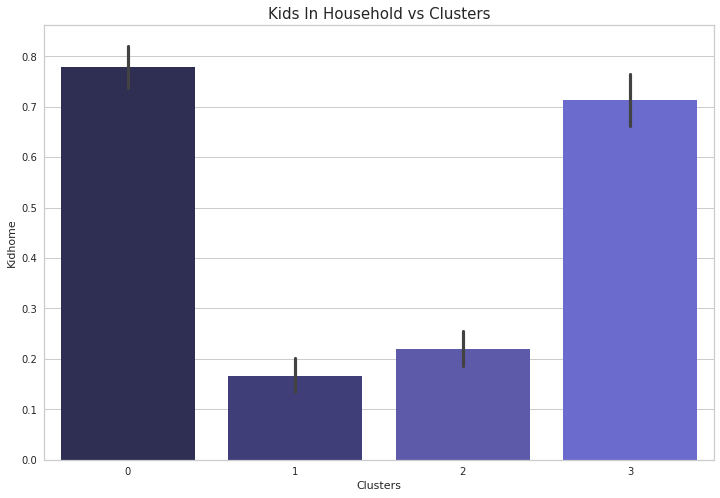

In [86]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Kidhome"],palette=palette)
plt.title("Kids In Household vs Clusters", size=15)
plt.show()

**Observation:**
* Cluster 0 and 3 has the maximum number of customers with kids in household
* Cluster 1 and 2 has the least number of customers with kids in household

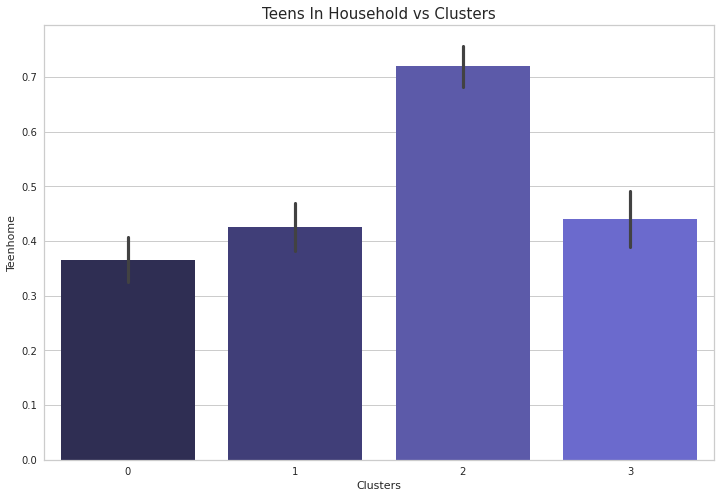

In [87]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Teenhome"],palette=palette)
plt.title("Teens In Household vs Clusters", size=15)
plt.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Cluster 2 has maximum number of customers having Teens in household <br>
           2. Remaining Clusters also have customers with Teens in household but they are less as compared to cluster 2 <br>
        </p>
    </div>

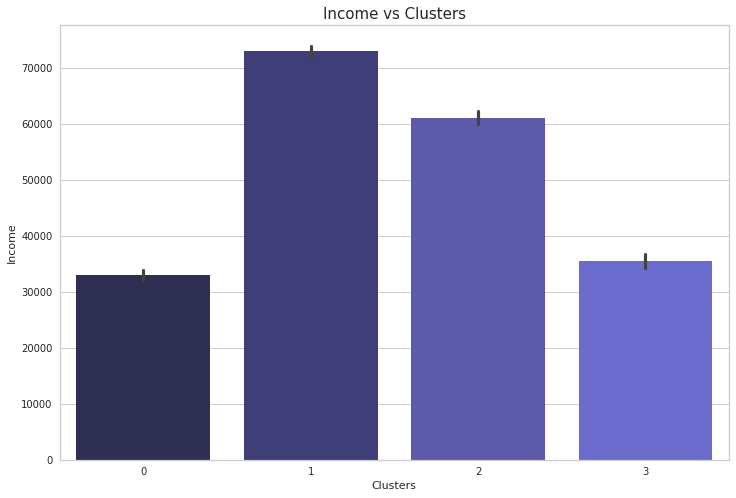

In [88]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Cluster 1 has high Income followed by cluster 2. Which is little strange cause cluster 2 has highest number of customers and most number of post graduates & graduates as compared to cluster 1<br>
           2. Cluster 0 and 3 has least income<br>
        </p>
    </div>

### Following graphs shows what are the contributing factors in income

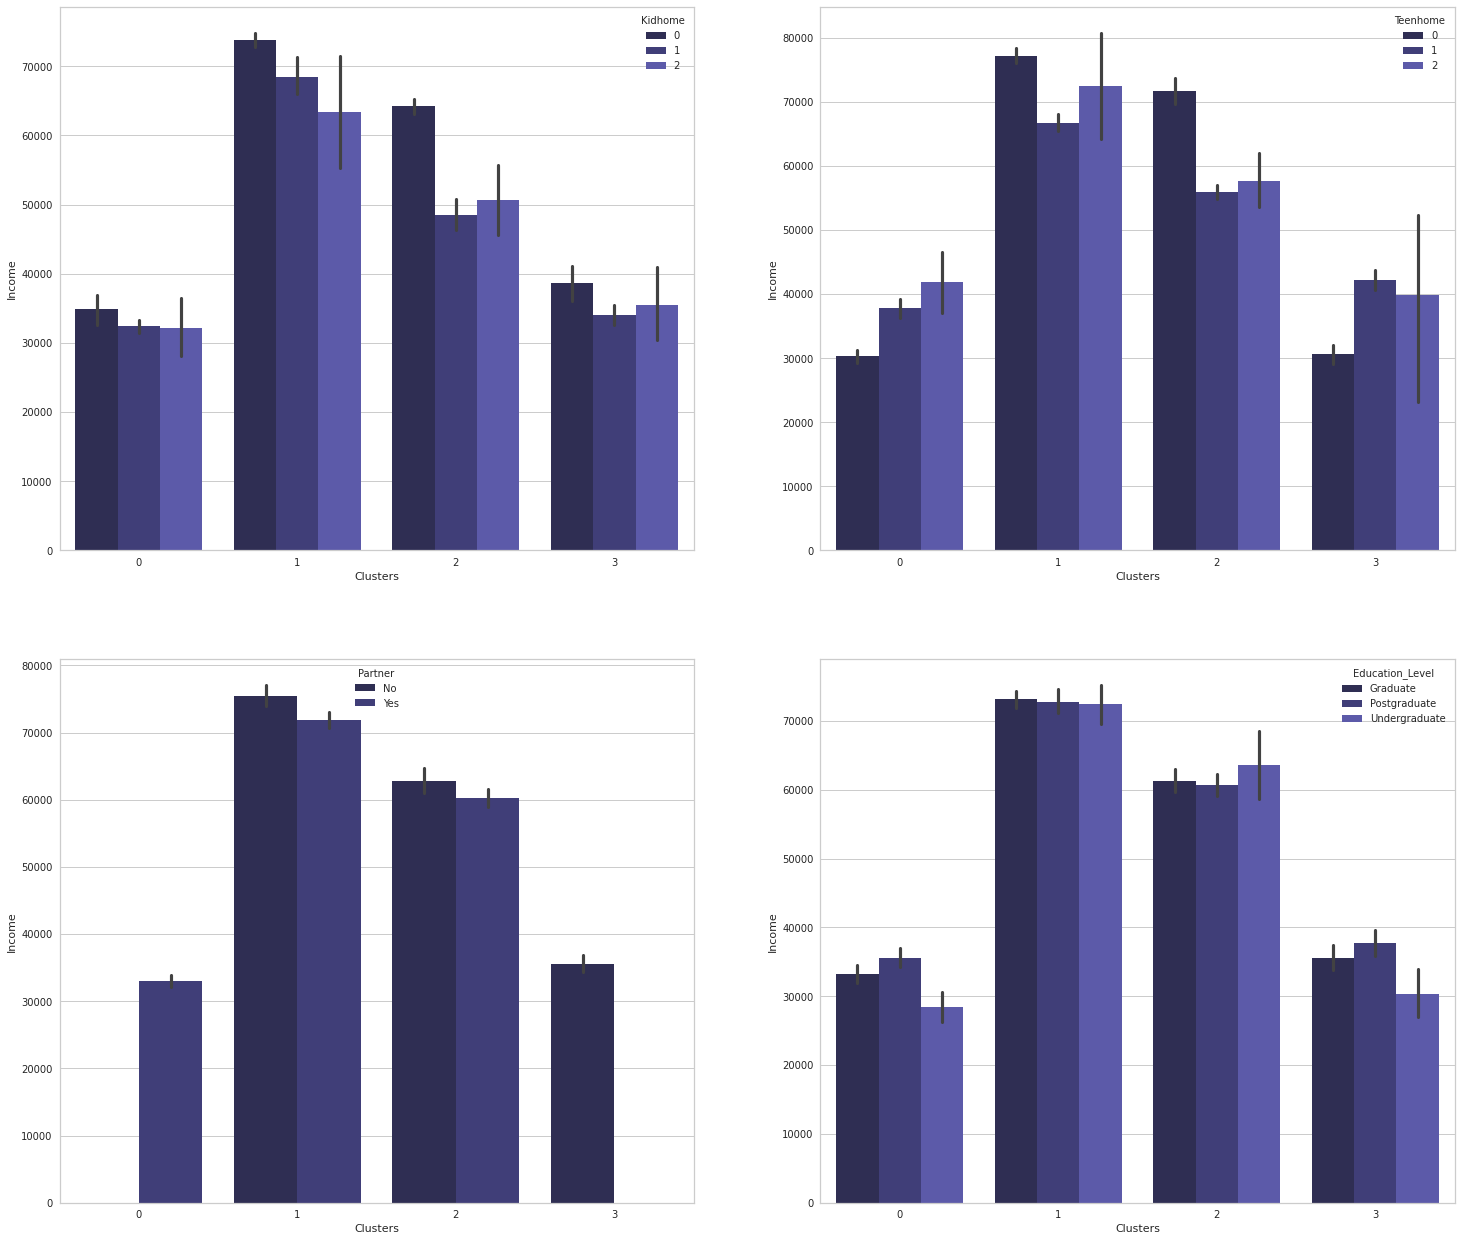

In [89]:
catcols= ['Kidhome','Teenhome','Partner','Education_Level']

_, ax1 = plt.subplots(2,2, figsize=(25,22))

for i, col in enumerate(catcols):
    sns.barplot(x='Clusters', y='Income', data=subset, ax=ax1[i//2, i%2],hue=col,palette=palette)
    
plt.show()

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Very interesting thing i can see from first 2 plots is, We saw before the number of  customers with 2 kids or teens is very very less still their income is similar to the customers which have no kids or teens or have 1 kid & teen. So I conclude that the customers with more than 1 kid or teen in houehold has high household income 1<br>
           2. From last 2 plots i think education_level and partner has nothing to do with income. Infact undergraduates are earniing equal or more than graduates and postgraduates within each cluster.<br>
        </p>
    </div>

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">CUSTOMER PROFILING</h2> 

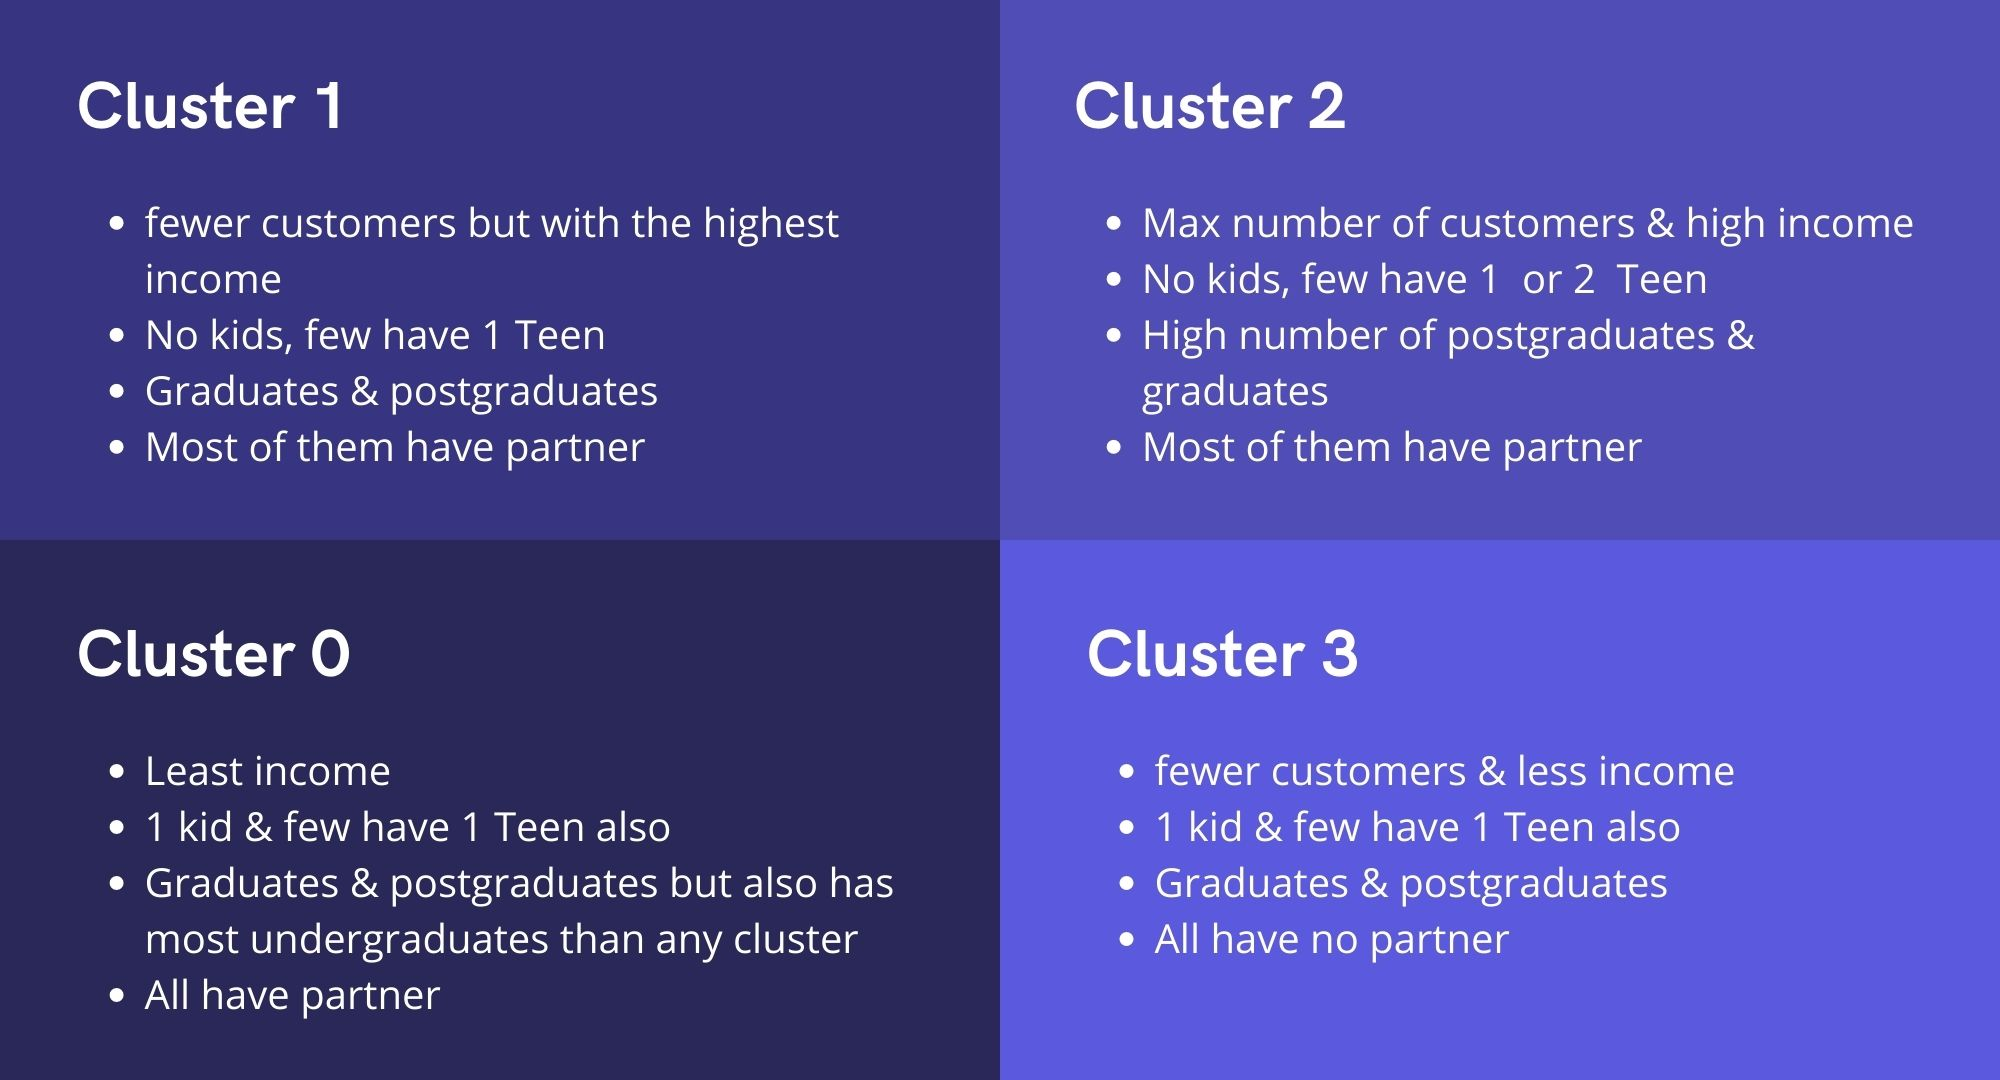

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">MODEL BUILDING</h2> 

### Now lets build a multi classification model that will predict the cluster for given input of perticular customer
### **Steps To Follow:**
* Import required libraries
* Separate features and target column (Clusters)
* Create train and test data by spliting
* Just add gradient boosting classifier to existing transformer pipeline
* Fit data to the new pipeline

In [90]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
# separate features and target column
x = subset.drop('Clusters', axis=1)
y = subset['Clusters']

In [92]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [93]:
# adding GradientBoostingClassifier to transformer pipeline
final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())

In [94]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                               

### Above is the diagram with all the steps in our pipeline

In [95]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)

0.9702380952380952

### You can export this pipeline with all the transformation and trained model

In [96]:
import pickle

In [97]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb')) 

<h2 style="background-color:#29285D;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">MODEL DEPLOYMENT</h2> 

In [98]:
# Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

m##################) ⠼ reify:yargs: timing reifyNode:node_modules/localtunnel/nlocaltm
changed 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


* To deploy any file, it should be in .py format
* Make a .py file and Put code for front and backhand inside .py file
* %%writefile command will convert all the code within this cell into .py file

In [99]:
%%writefile customer_segmentation_app.py 


# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))


#page configuration
st.set_page_config(page_title = 'Customer Segmentation Web App', layout='centered')
st.title('Customer Segmentation Web App')

# customer segmentation function
def segment_customers(input_data):
    
    prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1

def main():
    
    Income = st.text_input("Type In The Household Income")
    Kidhome = st.radio ( "Select Number Of Kids In Household", ('0', '1','2') )
    Teenhome = st.radio ( "Select Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( "Select Age", 18, 85 )
    Partner = st.radio ( "Livig With Partner?", ('Yes', 'No') )
    Education_Level = st.radio ( "Select Education", ("Undergraduate", "Graduate", "Postgraduate") )
    
    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])
    
    st.success(result)
    

if __name__ == '__main__':
        main ()
        
# I have kept it very simple, but i can buitify the web app by using html

Overwriting customer_segmentation_app.py


### When you'll run following cell, it will display a UI in your terminal with public URL of your tunnel and other status and metrics information about connections made over your tunnel

In [100]:
!streamlit run customer_segmentation_app.py & npx localtunnel --port 8501 

2022-07-30 18:07:05.004 INFO    numexpr.utils: NumExpr defaulting to 4 threads.
Need to install the following packages:
  localtunnel
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Network URL: http://172.19.2.2:8501
  External URL: http://35.194.156.167:8501

npm ERR! canceled

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2022-07-30T18_07_04_670Z-debug-0.log


### Sometimes it don't work in kaggle. if not working use Google Colab with same code and you'll get a link for the webapp

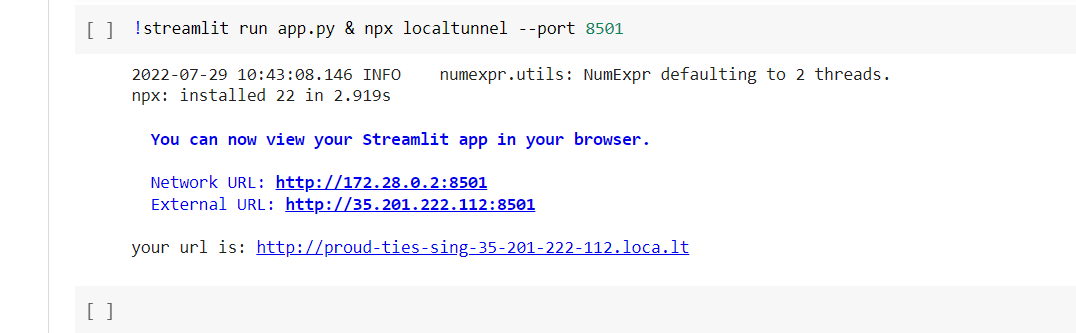

### Click on the link and youll be on the webapp

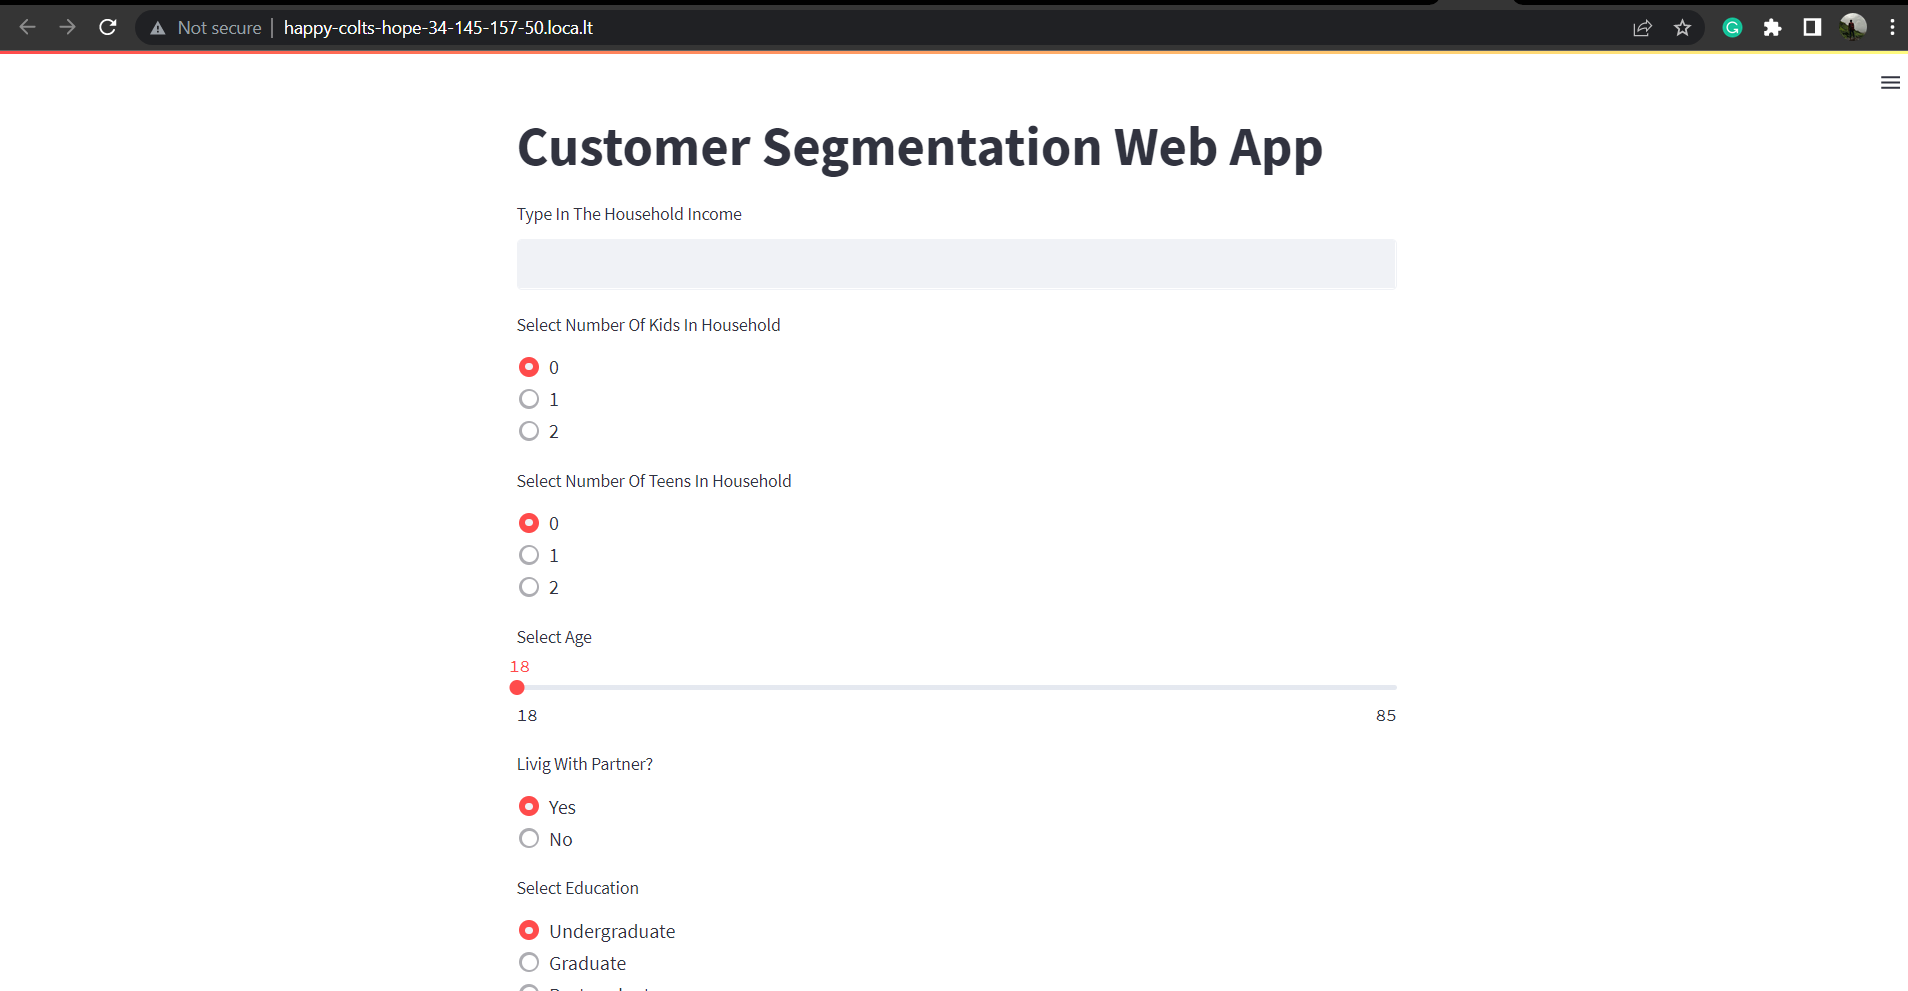